In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from tifffile import imread, imwrite
from skimage.color import label2rgb
from skimage.util import img_as_ubyte, img_as_uint
from skimage.measure import regionprops, regionprops_table, label
from skimage.segmentation import find_boundaries
from skimage.morphology import remove_small_objects

In [3]:
base_path = "Z:/Data/Analyzed/2024-01-08-Jiakun-MouseSpleen64Gene/images/flamingo/"
gray_img_path = os.path.join(base_path, 'DAPI')
input_path = os.path.join(base_path, 'stardist_sample')
output_path = os.path.join(base_path, 'stardist_sample', 'temp')

positions = sorted([f.replace('dist-watershed.tif', '') for f in os.listdir(input_path) if "watershed" in f])
positions

['Position1402',
 'Position241',
 'Position485',
 'Position488',
 'Position506',
 'Position559']

In [4]:
areas = []
for current_position in tqdm(positions):
    current_gray_img = imread(os.path.join(gray_img_path, f"{current_position}.tif"), dtype='uint8')
    current_label_img = imread(os.path.join(input_path, f"{current_position}dist-watershed.tif"))
    current_label_img = current_label_img.astype(np.uint16)

    for i, region in tqdm(enumerate(regionprops(current_label_img))):
        areas.append(region.area)

  0%|          | 0/6 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

<Axes: ylabel='Count'>

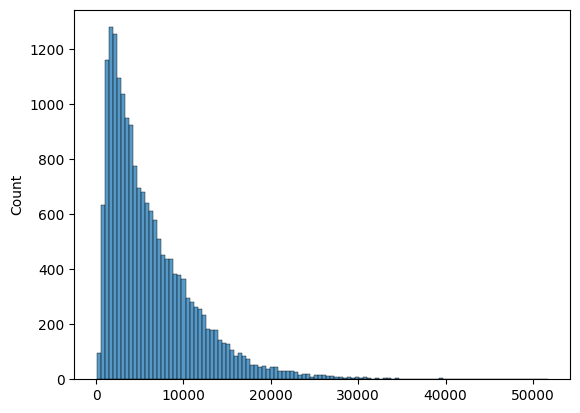

In [5]:
sns.histplot(areas)

## Generate small samples

In [4]:
img_path = os.path.join(output_path, 'img')
if not os.path.exists(img_path):
    os.mkdir(img_path)

mask_path = os.path.join(output_path, 'mask')
if not os.path.exists(mask_path):
    os.mkdir(mask_path)

preview_path = os.path.join(output_path, 'preview')
if not os.path.exists(preview_path):
    os.mkdir(preview_path)

In [18]:
n_samples_per_position = 40

a = 1
for current_position in tqdm(positions):
    current_gray_img = imread(os.path.join(gray_img_path, f"{current_position}.tif"), dtype='uint8')
    current_label_img = imread(os.path.join(input_path, f"{current_position}dist-watershed.tif"))
    current_label_img = current_label_img.astype(np.uint16)

    current_blank_gray_img = np.zeros(current_gray_img.shape, dtype=np.uint8)
    current_blank_label_img = np.zeros(current_gray_img.shape, dtype=np.uint16)

    for i, region in tqdm(enumerate(regionprops(current_label_img))):
        if region.area > 3000 and region.area < 7000:
            current_blank_label_img[region.coords[:,0], region.coords[:,1], region.coords[:,2]] = region.label
            current_blank_gray_img[region.coords[:,0], region.coords[:,1], region.coords[:,2]] = current_gray_img[region.coords[:,0], region.coords[:,1], region.coords[:,2]]

    coords_x = np.random.randint(0, 1368, n_samples_per_position)
    coords_y = np.random.randint(0, 1368, n_samples_per_position)

    for j in range(n_samples_per_position):
        current_x = coords_x[j]
        current_y = coords_y[j]
        current_sample_gary_img = current_blank_gray_img[:, current_x:current_x+128, current_y:current_y+128]
        current_sample_label_img = current_blank_label_img[:, current_x:current_x+128, current_y:current_y+128]
        current_sample_label_img = label(current_sample_label_img)
        current_sample_label_img = img_as_uint(current_sample_label_img)
        current_preview = label2rgb(current_sample_label_img)
        imwrite(os.path.join(img_path, f'img_{a}.tif'), current_sample_gary_img)
        imwrite(os.path.join(mask_path, f'mask_{a}.tif'), current_sample_label_img)
        imwrite(os.path.join(preview_path, f'rgb_{a}.tif'), current_preview)
        a += 1

  0%|          | 0/6 [00:00<?, ?it/s]

0it [00:00, ?it/s]

C:\Users\jiahao\.conda\envs\stardist\lib\site-packages\skimage\util\dtype.py:500: UserWarning: Downcasting int64 to uint16 without scaling because max value 7 fits in uint16
  return _convert(image, np.uint16, force_copy)
C:\Users\jiahao\.conda\envs\stardist\lib\site-packages\skimage\util\dtype.py:500: UserWarning: Downcasting int64 to uint16 without scaling because max value 19 fits in uint16
  return _convert(image, np.uint16, force_copy)
C:\Users\jiahao\.conda\envs\stardist\lib\site-packages\skimage\util\dtype.py:500: UserWarning: Downcasting int64 to uint16 without scaling because max value 17 fits in uint16
  return _convert(image, np.uint16, force_copy)
C:\Users\jiahao\.conda\envs\stardist\lib\site-packages\skimage\util\dtype.py:500: UserWarning: Downcasting int64 to uint16 without scaling because max value 11 fits in uint16
  return _convert(image, np.uint16, force_copy)
C:\Users\jiahao\.conda\envs\stardist\lib\site-packages\skimage\util\dtype.py:500: UserWarning: Downcasting in

0it [00:00, ?it/s]

C:\Users\jiahao\.conda\envs\stardist\lib\site-packages\skimage\util\dtype.py:500: UserWarning: Downcasting int64 to uint16 without scaling because max value 39 fits in uint16
  return _convert(image, np.uint16, force_copy)
C:\Users\jiahao\.conda\envs\stardist\lib\site-packages\skimage\util\dtype.py:500: UserWarning: Downcasting int64 to uint16 without scaling because max value 37 fits in uint16
  return _convert(image, np.uint16, force_copy)
C:\Users\jiahao\.conda\envs\stardist\lib\site-packages\skimage\util\dtype.py:500: UserWarning: Downcasting int64 to uint16 without scaling because max value 36 fits in uint16
  return _convert(image, np.uint16, force_copy)
C:\Users\jiahao\.conda\envs\stardist\lib\site-packages\skimage\util\dtype.py:500: UserWarning: Downcasting int64 to uint16 without scaling because max value 40 fits in uint16
  return _convert(image, np.uint16, force_copy)
C:\Users\jiahao\.conda\envs\stardist\lib\site-packages\skimage\util\dtype.py:500: UserWarning: Downcasting i

0it [00:00, ?it/s]

C:\Users\jiahao\.conda\envs\stardist\lib\site-packages\skimage\util\dtype.py:500: UserWarning: Downcasting int64 to uint16 without scaling because max value 22 fits in uint16
  return _convert(image, np.uint16, force_copy)
C:\Users\jiahao\.conda\envs\stardist\lib\site-packages\skimage\util\dtype.py:500: UserWarning: Downcasting int64 to uint16 without scaling because max value 3 fits in uint16
  return _convert(image, np.uint16, force_copy)
C:\Users\jiahao\.conda\envs\stardist\lib\site-packages\skimage\util\dtype.py:500: UserWarning: Downcasting int64 to uint16 without scaling because max value 2 fits in uint16
  return _convert(image, np.uint16, force_copy)
C:\Users\jiahao\.conda\envs\stardist\lib\site-packages\skimage\util\dtype.py:500: UserWarning: Downcasting int64 to uint16 without scaling because max value 1 fits in uint16
  return _convert(image, np.uint16, force_copy)
C:\Users\jiahao\.conda\envs\stardist\lib\site-packages\skimage\util\dtype.py:500: UserWarning: Downcasting int6

0it [00:00, ?it/s]

C:\Users\jiahao\.conda\envs\stardist\lib\site-packages\skimage\util\dtype.py:500: UserWarning: Downcasting int64 to uint16 without scaling because max value 4 fits in uint16
  return _convert(image, np.uint16, force_copy)
C:\Users\jiahao\.conda\envs\stardist\lib\site-packages\skimage\util\dtype.py:500: UserWarning: Downcasting int64 to uint16 without scaling because max value 5 fits in uint16
  return _convert(image, np.uint16, force_copy)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

## Create cell repo

In [23]:
selected_path = os.path.join(output_path, 'selected')

ids = sorted([f.split('_')[1].replace('.tif', '') for f in os.listdir(selected_path) if "tif" in f])

In [24]:
areas = []
n_layers = []
for current_id in tqdm(ids):
    current_gray_img = imread(os.path.join(img_path, f"img_{current_id}.tif"), dtype='uint8')
    current_label_img = imread(os.path.join(mask_path, f"mask_{current_id}.tif"))
    current_label_img = current_label_img.astype(np.uint16)

    for i, region in enumerate(regionprops(current_label_img)):
        areas.append(region.area)
        n_layers.append(np.unique(region.coords[:, 0]).shape[0])

  0%|          | 0/139 [00:00<?, ?it/s]

<Axes: ylabel='Count'>

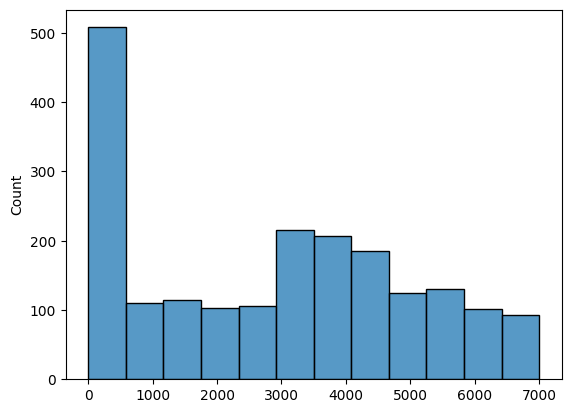

In [25]:
sns.histplot(areas)

<Axes: ylabel='Count'>

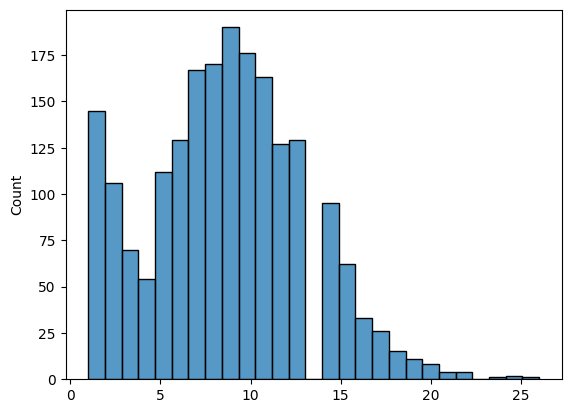

In [26]:
sns.histplot(n_layers)

In [27]:
cells = []
for current_id in tqdm(ids):
    current_gray_img = imread(os.path.join(img_path, f"img_{current_id}.tif"), dtype='uint8')
    current_label_img = imread(os.path.join(mask_path, f"mask_{current_id}.tif"))
    current_label_img = current_label_img.astype(np.uint16)
    
    for i, region in enumerate(regionprops(current_label_img, current_gray_img)):
        if region.area > 3000 and region.area < 7000:
            current_n_layers = np.unique(region.coords[:, 0]).shape[0]
            if current_n_layers > 5:
                cells.append(region)
            

  0%|          | 0/139 [00:00<?, ?it/s]

In [40]:
cell_path = os.path.join(output_path, 'cell')
if not os.path.exists(cell_path):
    os.mkdir(cell_path)


for i in range(10):
    imwrite(os.path.join(cell_path, f'mask_{i}.tif'), cells[i].image)
    imwrite(os.path.join(cell_path, f'img_{i}.tif'), cells[i].image_intensity)

In [28]:
output_path = 'Z:/Data/Analyzed/2024-01-08-Jiakun-MouseSpleen64Gene/images/flamingo/stardist_sample/train_2'
if not os.path.exists(output_path):
    os.mkdir(output_path)

img_path = os.path.join(output_path, 'img')
if not os.path.exists(img_path):
    os.mkdir(img_path)

mask_path = os.path.join(output_path, 'mask')
if not os.path.exists(mask_path):
    os.mkdir(mask_path)

In [29]:
n_samples_to_generate = 2000

for n in tqdm(range(n_samples_to_generate)):
    
    current_blank_gray_img = np.zeros(current_gray_img.shape, dtype=np.uint8)
    current_blank_label_img = np.zeros(current_gray_img.shape, dtype=np.uint16)
    
    n_cells_on_image = np.random.randint(2, 7)
    cells_index = np.random.randint(0, len(cells), n_cells_on_image)
    
    for i, j in enumerate(cells_index):
        current_region = cells[j]
        img_intensity_coords = current_region.coords.copy()
        img_intensity_coords[:, 0] = img_intensity_coords[:, 0] - current_region.bbox[0]
        img_intensity_coords[:, 1] = img_intensity_coords[:, 1] - current_region.bbox[1]
        img_intensity_coords[:, 2] = img_intensity_coords[:, 2] - current_region.bbox[2]
    
        current_blank_label_img[current_region.coords[:,0], current_region.coords[:,1], current_region.coords[:,2]] = i + 1
        current_blank_gray_img[current_region.coords[:,0], current_region.coords[:,1], current_region.coords[:,2]] = current_region.image_intensity[img_intensity_coords[:,0], img_intensity_coords[:,1], img_intensity_coords[:,2]]

    imwrite(os.path.join(mask_path, f'mask_{n+1}.tif'), current_blank_label_img)
    imwrite(os.path.join(img_path, f'img_{n+1}.tif'), current_blank_gray_img)

  0%|          | 0/2000 [00:00<?, ?it/s]

## Create cell repo with manual annotation

In [6]:
output_path = 'Z:/Data/Analyzed/2024-01-08-Jiakun-MouseSpleen64Gene/images/flamingo/stardist_sample'

In [8]:
data_path = os.path.join(output_path, 'train_manual')
img_path = os.path.join(data_path, 'img')
mask_path = os.path.join(data_path, 'mask')

ids = sorted([f.split('_')[1].replace('.tif', '') for f in os.listdir(img_path) if "tif" in f])

In [9]:
areas = []
n_layers = []
for current_id in tqdm(ids):
    current_label_img = imread(os.path.join(mask_path, f"mask_{current_id}.tif"))
    current_label_img = current_label_img.astype(np.uint16)

    for i, region in enumerate(regionprops(current_label_img)):
        areas.append(region.area)
        n_layers.append(np.unique(region.coords[:, 0]).shape[0])

  0%|          | 0/20 [00:00<?, ?it/s]

<Axes: ylabel='Count'>

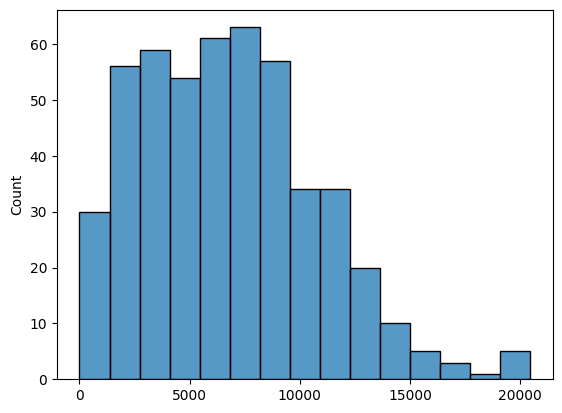

In [10]:
sns.histplot(areas)

<Axes: ylabel='Count'>

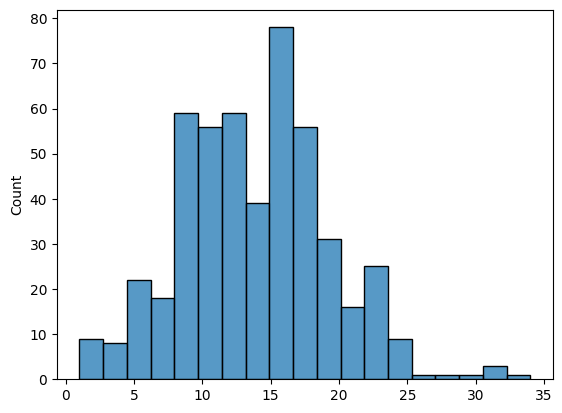

In [11]:
sns.histplot(n_layers)

In [27]:
cells = []
for current_id in tqdm(ids):
    current_gray_img = imread(os.path.join(img_path, f"img_{current_id}.tif"), dtype='uint8')
    current_label_img = imread(os.path.join(mask_path, f"mask_{current_id}.tif"))
    current_label_img = current_label_img.astype(np.uint16)
    
    for i, region in enumerate(regionprops(current_label_img, current_gray_img)):
        if region.area > 3000 and region.area < 7000:
            current_n_layers = np.unique(region.coords[:, 0]).shape[0]
            if current_n_layers > 5:
                cells.append(region)
            

  0%|          | 0/139 [00:00<?, ?it/s]

In [40]:
cell_path = os.path.join(output_path, 'cell')
if not os.path.exists(cell_path):
    os.mkdir(cell_path)


for i in range(10):
    imwrite(os.path.join(cell_path, f'mask_{i}.tif'), cells[i].image)
    imwrite(os.path.join(cell_path, f'img_{i}.tif'), cells[i].image_intensity)

In [28]:
output_path = 'Z:/Data/Analyzed/2024-01-08-Jiakun-MouseSpleen64Gene/images/flamingo/stardist_sample/train_2'
if not os.path.exists(output_path):
    os.mkdir(output_path)

img_path = os.path.join(output_path, 'img')
if not os.path.exists(img_path):
    os.mkdir(img_path)

mask_path = os.path.join(output_path, 'mask')
if not os.path.exists(mask_path):
    os.mkdir(mask_path)

In [29]:
n_samples_to_generate = 2000

for n in tqdm(range(n_samples_to_generate)):
    
    current_blank_gray_img = np.zeros(current_gray_img.shape, dtype=np.uint8)
    current_blank_label_img = np.zeros(current_gray_img.shape, dtype=np.uint16)
    
    n_cells_on_image = np.random.randint(2, 7)
    cells_index = np.random.randint(0, len(cells), n_cells_on_image)
    
    for i, j in enumerate(cells_index):
        current_region = cells[j]
        img_intensity_coords = current_region.coords.copy()
        img_intensity_coords[:, 0] = img_intensity_coords[:, 0] - current_region.bbox[0]
        img_intensity_coords[:, 1] = img_intensity_coords[:, 1] - current_region.bbox[1]
        img_intensity_coords[:, 2] = img_intensity_coords[:, 2] - current_region.bbox[2]
    
        current_blank_label_img[current_region.coords[:,0], current_region.coords[:,1], current_region.coords[:,2]] = i + 1
        current_blank_gray_img[current_region.coords[:,0], current_region.coords[:,1], current_region.coords[:,2]] = current_region.image_intensity[img_intensity_coords[:,0], img_intensity_coords[:,1], img_intensity_coords[:,2]]

    imwrite(os.path.join(mask_path, f'mask_{n+1}.tif'), current_blank_label_img)
    imwrite(os.path.join(img_path, f'img_{n+1}.tif'), current_blank_gray_img)

  0%|          | 0/2000 [00:00<?, ?it/s]

## Test

In [60]:
current_position = 'Position241'

current_gray_img = imread(os.path.join(gray_img_path, f"{current_position}.tif"), dtype='uint8')
current_label_img = imread(os.path.join(input_path, f"{current_position}dist-watershed.tif"))
current_label_img = current_label_img.astype(np.uint16)

current_blank_gray_img = np.zeros(current_gray_img.shape, dtype=np.uint8)
current_blank_label_img = np.zeros(current_gray_img.shape, dtype=np.uint16)

In [61]:
areas = []
for i, region in enumerate(regionprops(current_label_img, current_gray_img)):
    areas.append(region.area)
    if region.area > 3000 and region.area < 7000:
        current_blank_label_img[region.coords[:,0], region.coords[:,1], region.coords[:,2]] = region.label
        current_blank_gray_img[region.coords[:,0], region.coords[:,1], region.coords[:,2]] = current_gray_img[region.coords[:,0], region.coords[:,1], region.coords[:,2]]

In [62]:
imwrite(os.path.join(input_path, 'label.tif'), current_blank_label_img)
imwrite(os.path.join(input_path, 'image.tif'), current_blank_gray_img)

In [68]:
coords_x = np.random.randint(0, 1368, 20)
coords_y = np.random.randint(0, 1368, 20)

In [70]:
for j in range(1):
    current_x = coords_x[j]
    current_y = coords_y[j]
    current_sample_gary_img = current_blank_gray_img[:, current_x:current_x+128, current_y:current_y+128]
    current_sample_label_img = current_blank_label_img[:, current_x:current_x+128, current_y:current_y+128]
    imwrite(os.path.join(input_path, f'img_{j}.tif'), current_sample_gary_img)
    imwrite(os.path.join(input_path, f'label_{j}.tif'), current_sample_label_img)

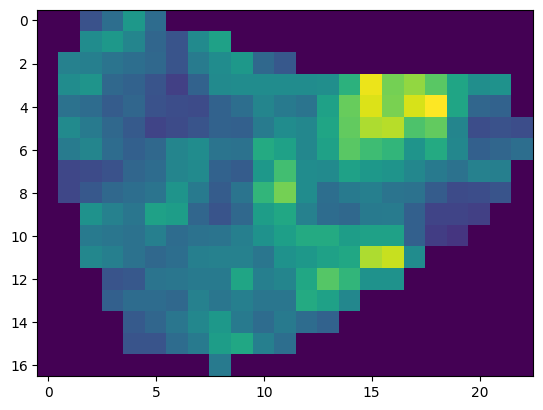

In [55]:
plt.imshow(region.image_intensity[0, :, :])